<a href="https://colab.research.google.com/github/AdrianduPlessis/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
#Global imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import scipy.stats as stats

In [2]:
#Load Data
headers = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
         'A13', 'A14', 'A15', 'A16']

df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = headers)

#Validate Shape
assert(df_raw.shape == (690, 16)) #UCI says 15 attribures, but the 'names' identifies 16.

#Verify NaN recognition
df_raw.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

Inconsistent with UCI listing and the 'crx.names' file specifies:

"Missing Attribute Values:
    37 cases (5%) have one or more missing values.  The missing
    values from particular attributes are:

    A1:  12
    A2:  12
    A4:   6
    A5:   6
    A6:   9
    A7:   9
    A14: 13"

In [3]:
#checking for value in A1 that occors 12 times
df_raw['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

'?' must be the NaN. Redo import accordingly

In [0]:
df_crx = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names = headers, na_values='?')

In [5]:
#Confirm Data Types
#Expecting floats in: A2, A3, A8, A11, A14, A15
df_crx.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

Seems consistent. Checking A15 (int not float) for reasonability

In [6]:
df_crx.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


int value seems reasonable

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when **grouped by the two class labels (`+` and `-`).**

For the 6 continuous features, how are they different when split between the two class labels? **Choose two features to run t-tests (again split by class label)** - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). *italicized text* You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
#Create subsets by class +/- (A16)
df_crx_p = df_crx[df_crx['A16']=='+']
df_crx_m = df_crx[df_crx['A16']=='-']

#TODO split by dtype cont./cat.

###T-Tests on Continues Vars.

####Generate All t-tests to compare

In [8]:
#Exploring the 6 continues features
for attribute in ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']:
  tstat, pvalue = ttest_ind(df_crx_p[attribute], df_crx_m[attribute])
  print(f'For {attribute}:')
  print('t-stat ', tstat)
  print('pvalue ', pvalue)
  print('----------------')

For A2:
t-stat  nan
pvalue  nan
----------------
For A3:
t-stat  5.52998337614816
pvalue  4.551680702308068e-08
----------------
For A8:
t-stat  8.935819983773698
pvalue  3.6710537401601785e-18
----------------
For A11:
t-stat  11.667004222431277
pvalue  7.957718568079967e-29
----------------
For A14:
t-stat  nan
pvalue  nan
----------------
For A15:
t-stat  4.680216020964486
pvalue  3.4520256956287944e-06
----------------


In [0]:
#TODO code interpretation and sort by significance

TODO: Interpret the NaN T-stat results

####Generate Selected t-tests

In [10]:
#Exploring the 6 continues features
for attribute in ['A11', 'A15']:
  tstat, pvalue = ttest_ind(df_crx_p[attribute], df_crx_m[attribute])
  print(f'For {attribute}:')
  print('t-stat ', tstat)
  print('pvalue ', pvalue)
  print('----------------')

For A11:
t-stat  11.667004222431277
pvalue  7.957718568079967e-29
----------------
For A15:
t-stat  4.680216020964486
pvalue  3.4520256956287944e-06
----------------


####Confidence Interval

In [11]:
A11_p = df_crx_p['A11']

S = np.std(A11_p)
print('Standard deviation is: ', S)
n = len(A11_p)
print('Sample size is: ', n)
t = stats.t.ppf(0.975, n-1) #for 95% confidence
print('t distribution is: ', t)

standard_err = S / np.sqrt(n)
margin_of_err = t * standard_err
confidence_interval_p = (A11_p.mean() - margin_of_err, A11_p.mean() + margin_of_err)

print(f'The confidence interval is: {confidence_interval_p}')

Standard deviation is:  6.309939794943474
Sample size is:  307
t distribution is:  1.9677467375892304
The confidence interval is: (3.8972239005334663, 5.314502483831355)


In [12]:
A11_m = df_crx_m['A11']

S = np.std(A11_m)
print('Standard deviation is: ', S)
n = len(A11_m)
print('Sample size is: ', n)
t = stats.t.ppf(0.975, n-1) #for 95% confidence
print('t distribution is: ', t)

standard_err = S / np.sqrt(n)
margin_of_err = t * standard_err
confidence_interval_m = (A11_m.mean() - margin_of_err, A11_m.mean() + margin_of_err)

print(f'The confidence interval is: {confidence_interval_m}')

Standard deviation is:  1.897567072132846
Sample size is:  383
t distribution is:  1.9661935068269198
The confidence interval is: (0.4412094063835571, 0.8224981654180096)


####Graphical representation

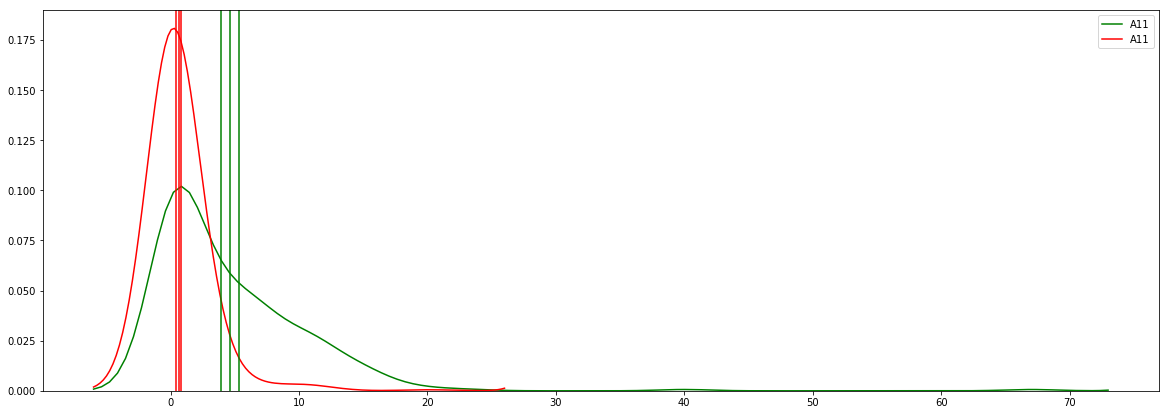

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,7))

sample_p = df_crx_p['A11']
sample_m = df_crx_m['A11']

sns.kdeplot(sample_p, bw = 2, color = 'g', ax=ax)
sns.kdeplot(sample_m, bw = 2, color = 'r', ax=ax)
plt.axvline(x=sample_p.mean(), color = 'g')
plt.axvline(x=sample_m.mean(), color = 'r')

plt.axvline(confidence_interval_p[0], color = 'g')
plt.axvline(confidence_interval_p[1], color = 'g')

plt.axvline(confidence_interval_m[0], color = 'r')
plt.axvline(confidence_interval_m[1], color = 'r')
#plt.title()


plt.show()

A11 is extremly different and A15 less different. Meaning: A11 has a greater influence on whether an individual is approved or not than A15

**TODO Graph (A11, A15) color/groupby approval. Might be interesting to see when one outweighs the other**

###Chi Square Test on Categoricals

####Crosstab hand itterations

In [14]:
pd.crosstab(df_crx['A16'], df_crx['A1'], margins=True)

A1,a,b,All
A16,,,
+,98,206,304
-,112,262,374
All,210,468,678


In [15]:
pd.crosstab(df_crx['A16'], df_crx['A4'], margins=True)

A4,l,u,y,All
A16,,,,
+,2,256,45,303
-,0,263,118,381
All,2,519,163,684


In [16]:
pd.crosstab(df_crx['A16'], df_crx['A5'], margins=True)

A5,g,gg,p,All
A16,,,,
+,256,2,45,303
-,263,0,118,381
All,519,2,163,684


In [17]:
pd.crosstab(df_crx['A16'], df_crx['A6'], margins=True)

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x,All
A16,,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32,303
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6,378
All,54,137,41,30,25,53,59,10,51,38,78,3,64,38,681


In [18]:
pd.crosstab(df_crx['A16'], df_crx['A7'], margins=True)

A7,bb,dd,ff,h,j,n,o,v,z,All
A16,,,,,,,,,,
+,25,2,8,87,3,2,1,169,6,303
-,34,4,49,51,5,2,1,230,2,378
All,59,6,57,138,8,4,2,399,8,681


In [19]:
pd.crosstab(df_crx['A16'], df_crx['A9'], margins=True)

A9,f,t,All
A16,,,
+,23,284,307
-,306,77,383
All,329,361,690


In [20]:
pd.crosstab(df_crx['A16'], df_crx['A10'], margins=True)

A10,f,t,All
A16,,,
+,98,209,307
-,297,86,383
All,395,295,690


In [21]:
pd.crosstab(df_crx['A16'], df_crx['A12'], margins=True)

A12,f,t,All
A16,,,
+,161,146,307
-,213,170,383
All,374,316,690


In [22]:
pd.crosstab(df_crx['A16'], df_crx['A13'], margins=True)

A13,g,p,s,All
A16,,,,
+,287,5,15,307
-,338,3,42,383
All,625,8,57,690


####Generate all Chi Squared tests

In [23]:
#Create all crosstabs to select extremes
#TODO Abstract Code
#Code ranking of attributes
for attribute in ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']:
  observed = pd.crosstab(df_crx['A16'], df_crx[attribute])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
  print(f'Attribute: \t{attribute} \nSquared Value: \t{chi_squared} \nP-value of: \t{p_value} \nDoF: \t\t{dof} \nExpected: \t{expected} \n \n')
  
  
 

Attribute: 	A1 
Squared Value: 	0.31128326491619945 
P-value of: 	0.5768937883001117 
DoF: 		1 
Expected: 	[[ 94.15929204 209.84070796]
 [115.84070796 258.15929204]] 
 

Attribute: 	A4 
Squared Value: 	26.234074966202144 
P-value of: 	2.010680204180363e-06 
DoF: 		2 
Expected: 	[[  0.88596491 229.90789474  72.20614035]
 [  1.11403509 289.09210526  90.79385965]] 
 

Attribute: 	A5 
Squared Value: 	26.234074966202144 
P-value of: 	2.010680204180363e-06 
DoF: 		2 
Expected: 	[[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]] 
 

Attribute: 	A6 
Squared Value: 	98.32520342679135 
P-value of: 	3.4999300402715717e-15 
DoF: 		13 
Expected: 	[[24.02643172 60.95594714 18.24229075 13.34801762 11.12334802 23.5814978
  26.25110132  4.44933921 22.69162996 16.90748899 34.70484581  1.33480176
  28.47577093 16.90748899]
 [29.97356828 76.04405286 22.75770925 16.65198238 13.87665198 29.4185022
  32.74889868  5.55066079 28.30837004 21.09251101 43.29515419  1.66519824
  3

A1 has a p-value > 0.05, I therefor cannot reject the null hypothesis (that: the observed results deviated from the expected due to random variation) with at least 95% confidence.

####Selected Chi Squares



In [24]:
for attribute in ['A9', 'A12']:
  observed = pd.crosstab(df_crx['A16'], df_crx[attribute])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
  print(f'Attribute: \t{attribute} \nSquared Value: \t{chi_squared} \nP-value of: \t{p_value} \nDoF: \t\t{dof} \nExpected: \t{expected} \n \n')

Attribute: 	A9 
Squared Value: 	355.2038167412799 
P-value of: 	3.1185900878457007e-79 
DoF: 		1 
Expected: 	[[146.38115942 160.61884058]
 [182.61884058 200.38115942]] 
 

Attribute: 	A12 
Squared Value: 	0.568273300792113 
P-value of: 	0.45094587758631943 
DoF: 		1 
Expected: 	[[166.40289855 140.59710145]
 [207.59710145 175.40289855]] 
 



**A9**: has an extremely high squared value of 355.2 more than double of any other categorical

**A12**: has a relativley high P-value of 0.45 (probability that difference in observed and expected is due to random chance), but is still < 0.05 and therefor significant enough to be a useful metric.

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###My Analysis and Interpretation (MVP)

####t-Tests

**Results**

```

For A11:
t-stat  11.667004222431277
pvalue  7.957718568079967e-29
----------------
For A15:
t-stat  4.680216020964486
pvalue  3.4520256956287944e-06
```



A11's observed values are extremly different from the expected values, assuming the null hypothesis that: A11 does not correlate to credit approval (A16). A15 less different, meaning: A11 has a greater influence on whether an individual is approved or not than A15

**TODO Graph (A11, A15) color/groupby approval. Might be interesting to see when one outweighs the other**

####Chi-squared tests

**Results**

```
Attribute: 	A9 
Squared Value: 	355.2038167412799 
P-value of: 	3.1185900878457007e-79 
DoF: 		1 
Expected: 	[[146.38115942 160.61884058]
 [182.61884058 200.38115942]] 
 

Attribute: 	A12 
Squared Value: 	0.568273300792113 
P-value of: 	0.45094587758631943 
DoF: 		1 
Expected: 	[[166.40289855 140.59710145]
 [207.59710145 175.40289855]] 
```



**A9**: has an extremely high Chi Squared value of 355.2 (more than double of any other categorical) indicating that this feature is highly correlated with credit approval.

**TODO**: Density/KDE graph of A9 to determine whether there is a sweetspot for approval, whether it's positively or negatively correlated. What the approval confidence is for certain ranges, etc.

**A12**: has a relativley high P-value of 0.45 (probability that difference in observed and expected is due to random chance), but is still < 0.05 and therefor significant enough to be a useful metric.

####The Most Challenging Part

Time management. To a lesser, but still significant extent: selecting and creating effective visualizations to draw and support conclusions.